## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [177]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Import Iris.csv

In [178]:
## Import the datafile
iris_df = pd.read_csv("iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [179]:
# Check dimension of data

In [180]:
iris_df.shape

(152, 6)

In [181]:
#Check data Type

In [182]:
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [183]:
# Check for NaN/Null values

In [184]:
iris_df[iris_df.isnull().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [185]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,151.0,5.843709,0.825314,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,151.0,1.202649,0.762185,0.1,0.30,1.30,1.80,2.5


### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

In [186]:
from sklearn.preprocessing import Imputer

In [187]:
x=iris_df.iloc[:,1:5]

In [188]:
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer = imputer.fit(x)
ImputedX = imputer.transform(x)

C:\Users\rohith.kumar.bathala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [189]:
ImputedX[:,0]


array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9, 5.9, 5.8])

In [190]:
ImputedIris_df=iris_df

In [191]:
ImputedIris_df.iloc[:,1]=ImputedX[:,0]

In [192]:
ImputedIris_df.iloc[:,2]=ImputedX[:,1]

In [193]:
ImputedIris_df.iloc[:,3]=ImputedX[:,2]

In [194]:
ImputedIris_df.iloc[:,4]=ImputedX[:,3]

In [195]:
ImputedIris_df[ImputedIris_df.isnull().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [196]:
ImputedIris_df["Species"].value_counts()

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [197]:
X=ImputedIris_df.drop(["Id","Species"],axis=1)
#Id is removed as there is no meaning in keeping Id as the independent variable

In [198]:
labelencoder = LabelEncoder()

In [199]:

ImputedIris_df['Specieslabel'] = labelencoder.fit_transform(ImputedIris_df['Species'])

In [200]:
y=ImputedIris_df["Specieslabel"]

In [201]:
#Check the dataset
print(y.shape)
print(X.shape)

(152,)
(152, 4)


### Find the distribution of target variable (Class) (1 Marks)

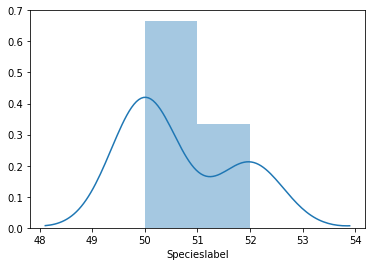

In [202]:
sns.distplot(y.value_counts(), hist=True)

In [203]:
#It is a bimodal Gaussian distribution having 2 peaks at 50,52

### Plot the distribution of target variable using histogram

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

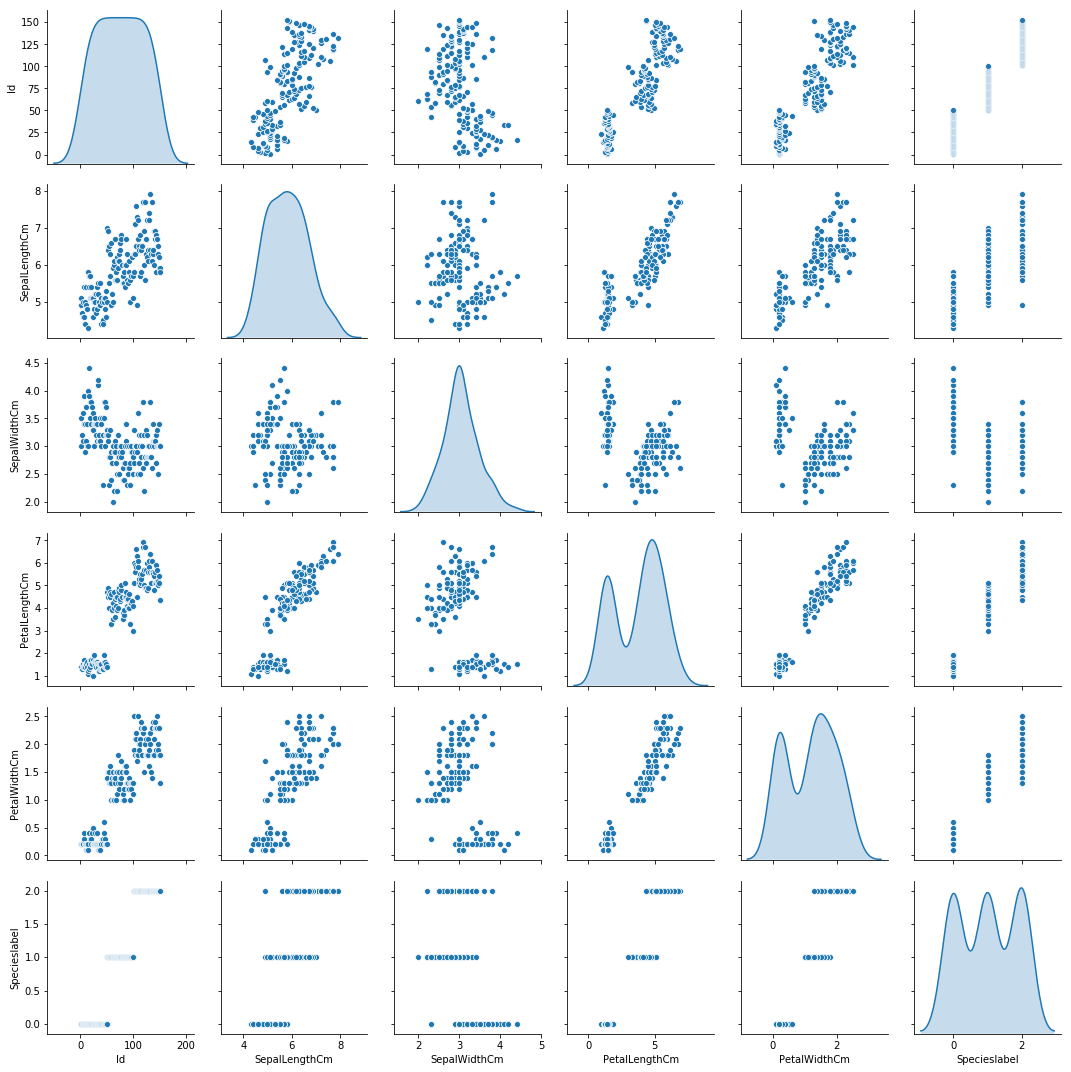

In [204]:
sns.pairplot(ImputedIris_df,diag_kind ='kde')

In [205]:
#from the pairplot , we can infer that the petallengthCM,petalWidthCM has bimodal gaussian distribtion with two peaks and remaining varaibles 
#has almost normal distributions and some of the variables even has slight positive correlation between them e.g., petalWidth and petal lenth 

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [206]:
ImputedIris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.30,1.30,1.80,2.5
Specieslabel,152.0,1.013158,0.821780,0.0,0.00,1.00,2.00,2.0


In [207]:
#For PetalLength , we can see that mean is less than median , i.e., it has long tails at the left which indicated possible outliers
#same is the case for PetalWidth

#Remaining two varaibles(SepalLength,SepalWidth) has almost uniform distributions.

In [208]:
#Drop Id variable from data

In [209]:
#Id variable is dropped from the independent variable set already in step 55

### Correlation among all variables and give your insights (1 Marks)

In [210]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [211]:
X.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


In [212]:
#From the above result, we can infer that almost petalLength and petal width has strong positive correlation
#Same is the case with PetalLength and SepalLength , PetalWidth and SepalLength
#In the Ideal scenario , if the accuracy of the model is poor we will remove any one of the above variable and try to improve the accuracy

### Split data in Training and Validation in 80:20 (1 Marks)

In [213]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
#Splitting into train and test after feature scaling of independent variables

### Do Feature Scaling ( 1 Marks)

In [214]:
# Use StandardScaler or similar methods

In [215]:
from scipy.stats import zscore

In [216]:
X_Scaled=X.apply(zscore) 

In [217]:
X_Scaled.shape

(152, 4)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.20, random_state=1)

### Train and Fit NaiveBayes Model(2 Marks)

In [219]:
#Fit the model

In [220]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [221]:
#Predict

In [222]:
expected = y_test
predicted = model.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [223]:
# show Confusion Matrix
from sklearn import metrics

In [224]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [225]:
# show accuracy

In [226]:
#Accuracy=(TruePositive+TrueNegative)/(TruePositive+TrueNegative+FalsePositive+FalseNegative)
#Here accuracy is 100%

In [227]:
#Show precision and Recall metrics

In [228]:
#From the summary report , we can see that , precision =1 , recall =1

## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [229]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [230]:
iris_df = pd.read_csv("iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [231]:
iris_df[iris_df.isnull().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [232]:
#Already Imputed the missing values , hence using the same data frame

In [233]:
ImputedIris_df.shape

(152, 7)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [234]:

from sklearn.preprocessing import LabelEncoder

In [235]:
labelencoder = LabelEncoder()

In [236]:

ImputedIris_df['Specieslabel'] = labelencoder.fit_transform(ImputedIris_df['Species'])

In [237]:
ImputedIris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Specieslabel
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [238]:
#Now SpeciesLabel is our target variable

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [239]:
ImputedIris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Specieslabel
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Specieslabel,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


In [240]:
#All the independent variables are correlated with the target variable

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [241]:
ImputedIris_df.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Specieslabel        0.675322
dtype: float64

In [242]:
#No variables with <0.1 variance ., But as it as non parametric algorithm ., variance should not play a part in the classification

## Question 6

*Plot the scatter matrix for all the variables.*

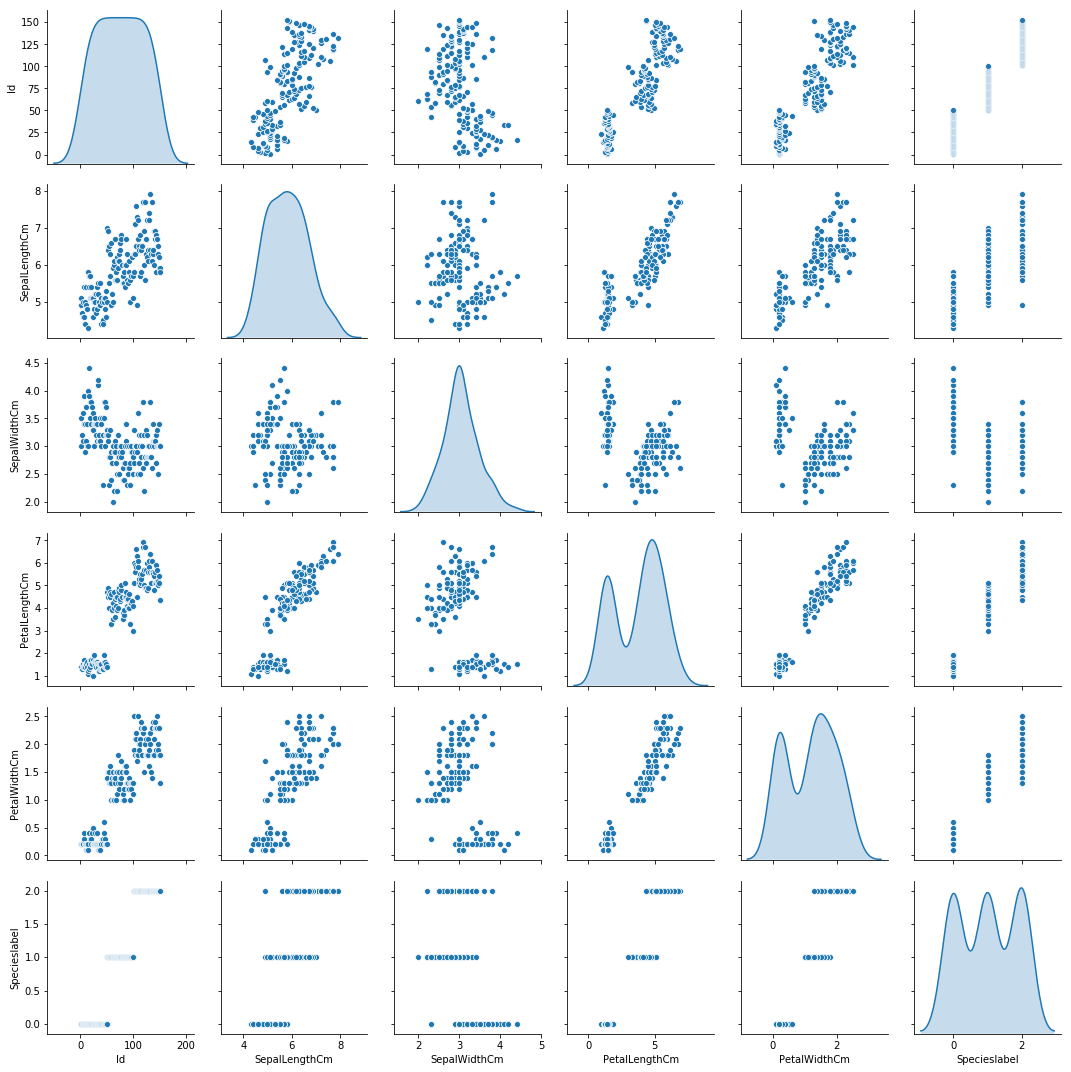

In [243]:
sns.pairplot(ImputedIris_df,diag_kind="kde")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [244]:
#Dropping the ID variable as it makes no sense for the classification

In [245]:
X=ImputedIris_df.drop(["Id","Species","Specieslabel"],axis=1)

In [246]:
y=ImputedIris_df["Specieslabel"]

In [247]:
#Scaling the features as it is important to maintain the same scale while calculating the distance

In [248]:
X_Scaled=X.apply(zscore) 

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.20, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [250]:
from sklearn.neighbors import KNeighborsClassifier

In [251]:
NNH3 = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )

In [252]:
NNH3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [253]:
NNH3.score(X_test, y_test)

1.0

In [254]:
NNH5 = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [255]:
NNH9 = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )

In [256]:
NNH5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [257]:
NNH9.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='distance')

In [258]:
NNH5.score(X_test, y_test)

1.0

In [259]:
NNH9.score(X_test, y_test)

1.0

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [260]:
from sklearn.model_selection import GridSearchCV

In [261]:
k = np.arange(1,21,2)
knn = KNeighborsClassifier(algorithm = 'kd_tree')
parameters = {'n_neighbors' : k}
##GS = GridSearchCV(knn, parameters, scoring = my_auc, cv=10)
GS = GridSearchCV(knn, parameters, cv=5)

In [262]:
GS.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [263]:
GS.best_params_

{'n_neighbors': 5}

In [264]:
GS.best_score_

0.9338842975206612

In [267]:
Results=GS.cv_results_

In [268]:
Accuracy=Results['mean_test_score']

In [269]:
MSE=1-Accuracy

In [270]:
MSE

array([0.09090909, 0.07438017, 0.0661157 , 0.0661157 , 0.07438017,
       0.07438017, 0.08264463, 0.0661157 , 0.07438017, 0.09090909])

In [271]:
#BestScore will be given by 5 and 7 as both have same MSE.
#But if we we check the best_score_ parameter , 5 neighbours has more accuracy(minute difference is there)

In [272]:
k

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [273]:
MSD=pd.DataFrame()

In [274]:
MSD['neighbours']=k

In [275]:
MSD['MSE']=MSE

In [276]:
MSD.head()

,neighbours,MSE
0,1,0.090909
1,3,0.074380
2,5,0.066116
3,7,0.066116
4,9,0.074380


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

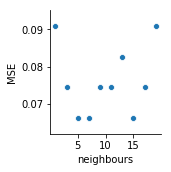

In [277]:
sns.pairplot(MSD,diag_kind='kde',x_vars='neighbours',y_vars='MSE')